[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dbwilburn/BIOC5721/blob/main/Gas_Law_Simulation_in_Python_AU24.ipynb)


# **BIOC5721 - Physical Biochemistry I**
DBW/RME 2024-08-19

To make best use of this notebook, Edit > Clear all outputs, then run desired cells sequentially

# In this script, we will make a **particle similator** to better understand the behavior of gas molecules in an isolated system (a box). You will be able to change the number of particles in the box, the mass of the particles, the size of the box, the average velocity of the particles, and the timestep of the simulation. You will see how these variables effect the pressure and temperature inside the box.

Run the next 2 blocks of code to intialize the simulation. Don't worry about the computational details. If you are interested in how the simulation works, see the notebook titled **Gas_Law_Simulation_in_Python_AU24_code_explanation.ipynb**.

In [6]:
!pip install numpy pandas scipy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, position, velocity, mass):
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.mass = mass

    def move(self, dt):
        # Update position based on velocity
        self.position += self.velocity * dt


    def collide_with_wall(self, box_size):
        # Check for collisions with walls and reflect velocity
        collision = 0.0
        for i in range(len(self.position)):
            if self.position[i] <= 0 or self.position[i] >= box_size[i]:
                self.velocity[i] *= -1
                collision += np.abs(self.velocity[i]) * 2
                self.position[i] = np.clip(self.position[i], 0, box_size[i])
        return collision


class Box:
    def __init__(self, size, particles):
        self.size = np.array(size, dtype=float)
        self.particles = particles
        self.pressure = 0
        self.temperature = 0

    def update(self, dt):
        # Reset pressure for this time step
        self.pressure = 0
        total_kinetic_energy = 0

        for particle in self.particles:
            particle.move(dt)

            # Calculate kinetic energy: 1/2 * m * v^2
            kinetic_energy = 0.5 * particle.mass * np.sum(particle.velocity ** 2)
            total_kinetic_energy += kinetic_energy

            # Calculate pressure contribution from wall collisions
            self.pressure += particle.collide_with_wall(self.size) / dt

        # Calculate temperature as proportional to average kinetic energy
        self.temperature = total_kinetic_energy /  1.5

    def simulate(self, steps, dt):
        # Prepare storage for positions, temperatures, and pressures
        positions_over_time = [[] for _ in range(len(self.particles))]
        temperatures = []
        pressures = []

        for step in range(steps):
            self.update(dt)
            temperatures.append(self.temperature)
            pressures.append(self.pressure)

            for i, particle in enumerate(self.particles):
                positions_over_time[i].append(particle.position.copy())

        return positions_over_time, temperatures, pressures

Use the following code block run the simutation.

At the top of the next code block are the adjustable parameters. You can adjust these parameters and rerun the simulation to see how these variables effect the temperature and pressure inside the box.

1. **num_particles**: The number of particles in the simulation.
2. **box_size**: The dimensions of the 2D box.
3. **dt**: The time step for the simulation. It controls how much time advances with each update.
4. **steps**: The total number of steps the simulation will run. This determines the duration of the simulation.
5. **velocity_scalar**: The standard deviation of the normal distribution used to randomly generate the velocities of the particles. It controls the speed of the particles.
6. **mass**: The mass of each particle.

In [7]:
# Adjustable arameters
num_particles = 500
box_size = [10, 10]
dt = 0.01
steps = 1000
velocity_scalar = 25
mass = 1.0

# Initialize particles with random positions and velocities
particles = [Particle(position=np.random.rand(2) * box_size,
                      velocity=np.random.normal(loc=0, scale=velocity_scalar, size=2), mass=mass) for _ in range(num_particles)]

# Create the box and run the simulation
box = Box(size=box_size, particles=particles)
positions_over_time, temperatures, pressures = box.simulate(steps=steps, dt=dt)

print('Simulation complete')

Simulation complete


Now that we've run our simulation, we can visualize the results! First we will look at the temperature and pressure over the course of the simulation.

Mean temperature:  430066.0
Mean pressure:  126628.63


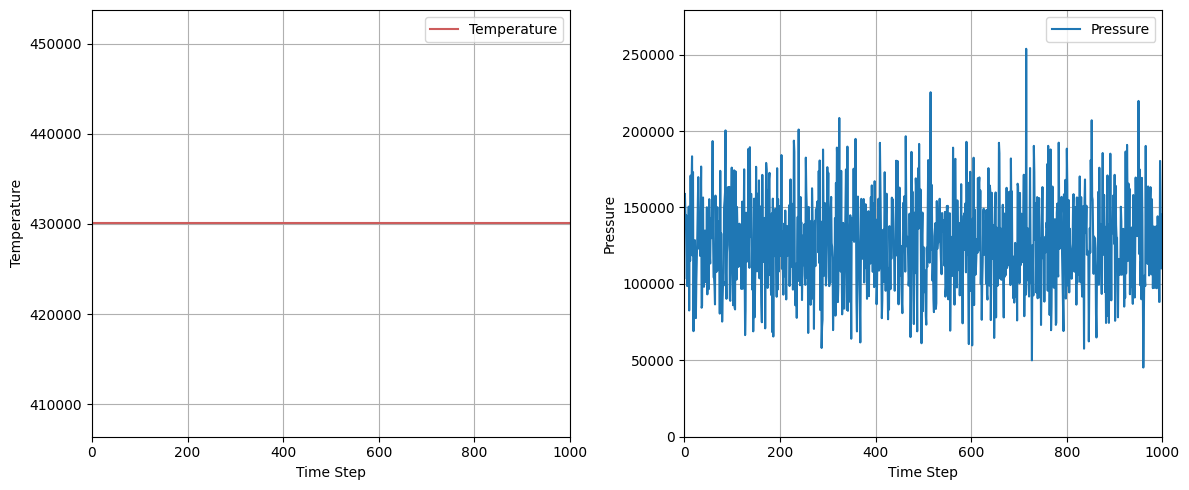

In [10]:
print('Mean temperature: ', str(round(np.mean(temperatures),2)))
print('Mean pressure: ', str(round(np.mean(pressures),2)))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting temperature
ax[0].plot(temperatures, label="Temperature", color = 'indianred')
ax[0].set_xlim(0, steps)
ax[0].set_xlabel("Time Step")
ax[0].set_ylabel("Temperature")
ax[0].grid(True)
ax[0].legend()

# Plotting pressure
ax[1].plot(pressures, label="Pressure")
ax[1].set_xlim(0, steps)
ax[1].set_ylim(0, max(pressures) + 0.1 * max(pressures))
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Pressure")
ax[1].grid(True)
ax[1].legend()
fig.tight_layout()

Run the next block of code to plot the particles trajectory over time.

The path of 10 particles is shown in the background in gray. You can change the number of particle trajectories plotted in the background by adjusting the **num_particles_to_plot parameter**. You can change the transparency of these trajectories by adjusting the **alpha** value. The smaller alpha is, the more transparent the trajectories will be.

The trajectory of a single particle is shown in **red**. The displayed trajectory might be long or short depending on the initial velocity of the particle. Rerunning the simulation and replotting the this data will change the plotted trajectories.

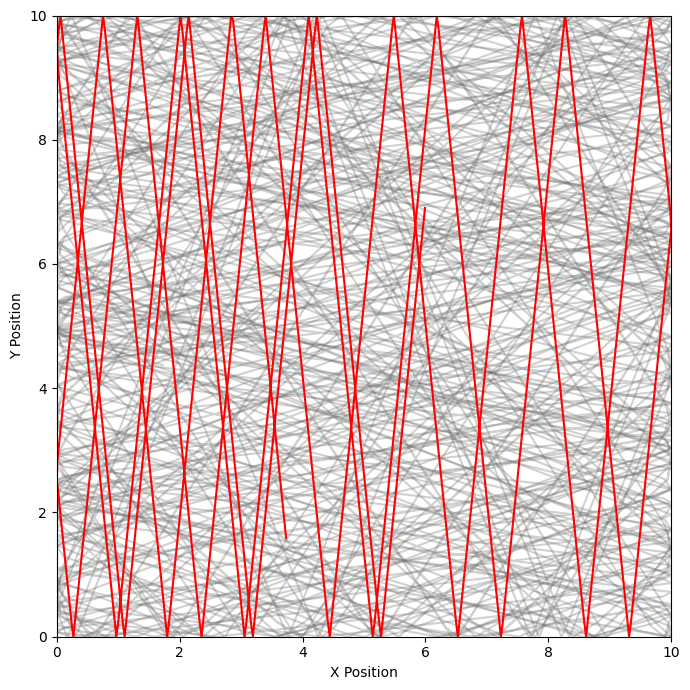

In [9]:
num_particles_to_plot = 10
alpha = 0.3
# Convert positions_over_time to a numpy array (time_steps, num_particles, 2)
trajectories = np.array(positions_over_time)

fig, ax = plt.subplots(figsize=(7, 7))

# Plot the next n particles in gray
for i in range(1, num_particles_to_plot):
    ax.plot(trajectories[i, :, 0], trajectories[i, :, 1], color='dimgray', alpha=alpha)

# Plot the first particle in red
ax.plot(trajectories[0, :, 0], trajectories[0, :, 1], color='red')

# Set limits and labels
ax.set_xlim(0, box_size[0])
ax.set_ylim(0, box_size[1])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
fig.tight_layout()

Now you can change the adjustable parameters, rerun the simulation, and replot the results to see how these variables effect temperature and pressure!